In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import subprocess
import pickle
%matplotlib inline

In [2]:
with open("../saved-experiments/width_depth_experiment_logs.pkl", "rb") as handle:
    dump = pickle.load(handle)

In [3]:
eff_dim = dump['eff_dim']
losses = dump['losses']
pars = dump['parameters']

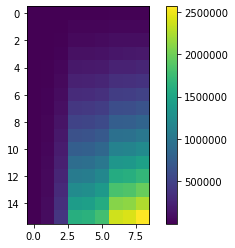

In [4]:
plt.imshow(pars)
plt.colorbar()

In [5]:
par_counts = np.zeros_like(pars)

Text(0, 0.5, 'Width')

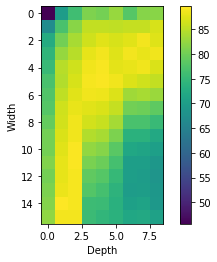

In [6]:
plt.imshow(eff_dim)
plt.colorbar()
plt.xlabel('Depth')
plt.ylabel('Width')

In [7]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

revcolors = np.copy(newcolors)
revcolors = revcolors[::-1, :]
alphacolors = np.copy(newcolors)
alphacolors[:, -1] = np.linspace(0.25, 0.75, 256)

newcmp = ListedColormap(revcolors, name='OrangeBlue')
revcmp = ListedColormap(newcolors, name='BlueOrange')
alphacmp = ListedColormap(alphacolors, name='OrangeBlueAlpha')

In [8]:
from scipy.interpolate import interp1d
x = np.array([2.0, 2.5, 3.0, 3.4, 4.3, 5.0,  6.0,  8.0, 10])
y = np.array([20,  8.0, 6.0, 5.5, 4.9, 4.6,  4.2,  3.5, 3.0])
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(2.0, 10, 100)
ynew = f2(xnew)

In [19]:
def plot_cutoff_curve(ax):
    ax.contour(losses[0, width_cut:, depth_cut:], levels=[0.5],
              linewidths=4., colors='darkgreen')
#     ax.plot(xnew, ynew, linewidth=2., color="orangered")
#     ax.scatter(x, y, color="gold")

In [20]:
def plot_par_contours(ax):
    ax.contour(pars, levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
               linewidths=4., linestyles='--')


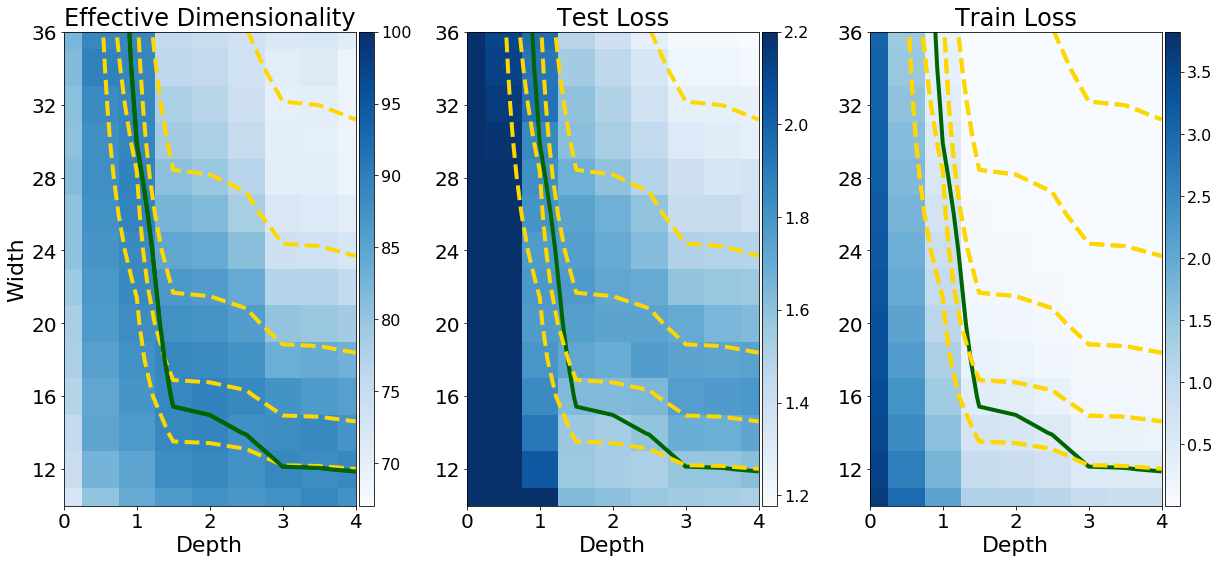

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 14))
plt.subplots_adjust(wspace=0.3)
width_cut = 1
depth_cut = 0
colormap = "Blues"
title_fs = 24
tick_fs = 16
axis_fs = 20
ax_fs = 22

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:], cmap=colormap, vmax=100)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p1, cax=cax)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label(r'$N_{eff}$(Hessian)', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax1)
ax1.set_xlim(depth_cut, 8-depth_cut)
ax1.set_ylim(width_cut, 15-width_cut)


ax1.set_xlabel('Depth', fontsize=ax_fs)
ax1.set_ylabel('Width', fontsize=ax_fs)
ax1.set_title('Effective Dimensionality', fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=axis_fs)
ax1.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:], cmap=colormap, vmax=2.2)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p2, cax=cax2)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)

ax2.set_xlabel('Depth',  fontsize=ax_fs)
# ax2.set_ylabel('Width')
ax2.set_title('Test Loss', fontsize=title_fs)
ax2.tick_params(axis="both", labelsize=axis_fs)
ax2.set_xlim(depth_cut, 8-depth_cut)
ax2.set_ylim(width_cut, 15-width_cut)
ax2.set_xticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:])


## train loss ##
p3 = ax3.imshow(losses[0,width_cut:, depth_cut:], cmap=colormap)
ax3.contour(pars, levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
           linewidths=4., linestyles='--')

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(p3, cax=cax3)
cbar.ax.tick_params(labelsize=tick_fs)
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Depth', fontsize=ax_fs)
# ax3.set_ylabel('Width')
ax3.set_title('Train Loss', fontsize=title_fs)
ax3.tick_params(axis="both", labelsize=axis_fs)
ax3.set_xlim(depth_cut, 8-depth_cut)
ax3.set_ylim(width_cut, 15-width_cut)
ax3.set_xticklabels([str(i) for i in range(9)][depth_cut:]);
ax3.set_yticklabels([str(i) for i in range(4,68,4)][width_cut:]);
plt.savefig("./width-depth-exp.pdf", bbox_inches="tight")

In [42]:
def plot_par_contours(ax):
    ax.contour(pars.transpose(), levels=[100000, 200000, 400000, 800000, 1600000], colors="gold",
               linewidths=4., linestyles='--')

def plot_cutoff_curve(ax):
    ax.contour(losses[0, width_cut:, depth_cut:].transpose(), levels=[0.0],
              linewidths=4., colors='darkgreen')
#     ax.plot(xnew, ynew, linewidth=2., color="orangered")
#     ax.scatter(x, y, color="gold")

//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


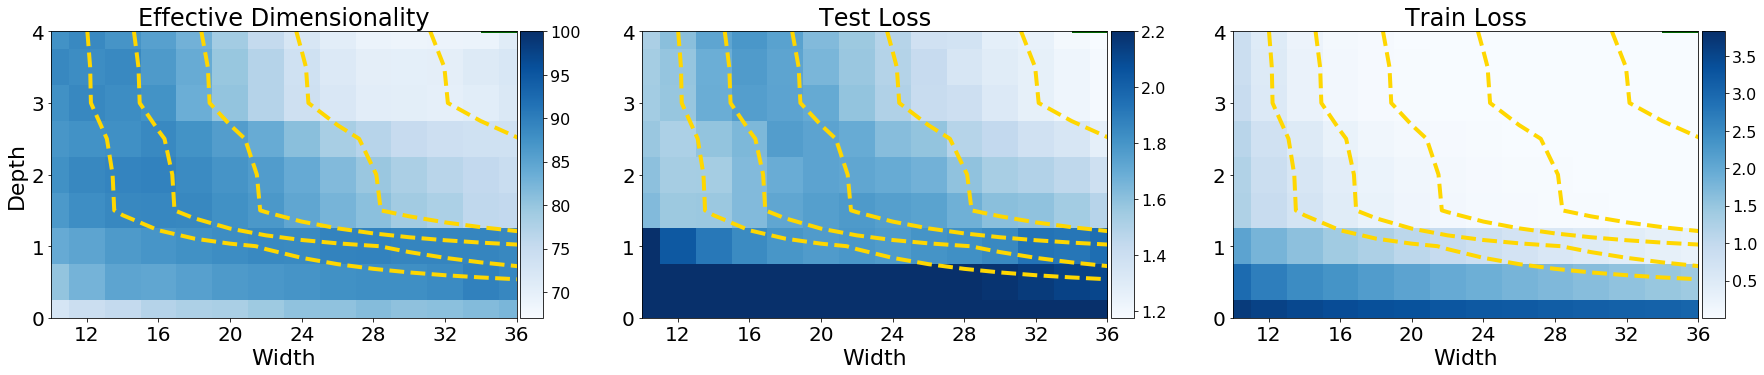

In [43]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 25))
plt.subplots_adjust(wspace=0.2)
width_cut = 1
depth_cut = 0
colormap = "Blues"
title_fs = 24
tick_fs = 16
axis_fs = 20
ax_fs = 22

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:].transpose(), cmap=colormap, vmax=100)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p1, cax=cax)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label(r'$N_{eff}$(Hessian)', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax1)
ax1.set_ylim(depth_cut, 8-depth_cut)
ax1.set_xlim(width_cut, 15-width_cut)


ax1.set_ylabel('Depth', fontsize=ax_fs)
ax1.set_xlabel('Width', fontsize=ax_fs)
ax1.set_title('Effective Dimensionality', fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=axis_fs)
ax1.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:].transpose(), cmap=colormap, vmax=2.2)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p2, cax=cax2)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)

ax2.set_xlabel('Width',  fontsize=ax_fs)
# ax2.set_ylabel('Width')
ax2.set_title('Test Loss', fontsize=title_fs)
ax2.tick_params(axis="both", labelsize=axis_fs)
ax2.set_ylim(depth_cut, 8-depth_cut)
ax2.set_xlim(width_cut, 15-width_cut)
ax2.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])


## train loss ##
p3 = ax3.imshow(losses[0,width_cut:, depth_cut:].transpose(), cmap=colormap)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(p3, cax=cax3)
cbar.ax.tick_params(labelsize=tick_fs)
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Width', fontsize=ax_fs)
# ax3.set_ylabel('Width')
ax3.set_title('Train Loss', fontsize=title_fs)
ax3.tick_params(axis="both", labelsize=axis_fs)
ax3.set_ylim(depth_cut, 8-depth_cut)
ax3.set_xlim(width_cut, 15-width_cut)
ax3.set_yticklabels([str(i) for i in range(9)][depth_cut:]);
ax3.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:]);
plt.savefig("./width-depth-exp.pdf", bbox_inches="tight")

In [44]:
path_norms = torch.load("../experiments/gen-bounds/path_norms.pt").t()

//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


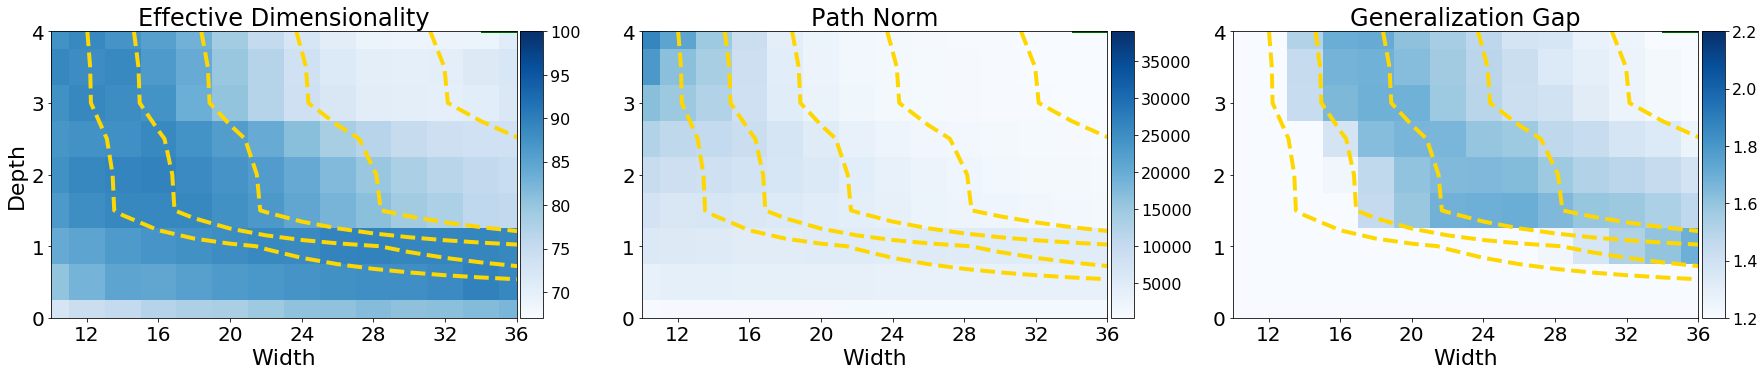

In [45]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 25))
plt.subplots_adjust(wspace=0.2)
width_cut = 1
depth_cut = 0
colormap = "Blues"
title_fs = 24
tick_fs = 16
axis_fs = 20
ax_fs = 22

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:].transpose(), cmap=colormap, vmax=100)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p1, cax=cax)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label(r'$N_{eff}$(Hessian)', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax1)
ax1.set_ylim(depth_cut, 8-depth_cut)
ax1.set_xlim(width_cut, 15-width_cut)


ax1.set_ylabel('Depth', fontsize=ax_fs)
ax1.set_xlabel('Width', fontsize=ax_fs)
ax1.set_title('Effective Dimensionality', fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=axis_fs)
ax1.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])

## test loss ##
p2 = ax2.imshow(path_norms[width_cut:, depth_cut:].numpy().transpose(), cmap=colormap)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p2, cax=cax2)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)

ax2.set_xlabel('Width',  fontsize=ax_fs)
# ax2.set_ylabel('Width')
ax2.set_title('Path Norm', fontsize=title_fs)
ax2.tick_params(axis="both", labelsize=axis_fs)
ax2.set_ylim(depth_cut, 8-depth_cut)
ax2.set_xlim(width_cut, 15-width_cut)
ax2.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])


## train loss ##
p3 = ax3.imshow((losses[2,width_cut:, depth_cut:] - losses[0, width_cut:, depth_cut:]).transpose(), cmap=colormap,
                vmax=2.2, vmin=1.2)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(p3, cax=cax3)
cbar.ax.tick_params(labelsize=tick_fs)
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Width', fontsize=ax_fs)
# ax3.set_ylabel('Width')
ax3.set_title('Generalization Gap', fontsize=title_fs)
ax3.tick_params(axis="both", labelsize=axis_fs)
ax3.set_ylim(depth_cut, 8-depth_cut)
ax3.set_xlim(width_cut, 15-width_cut)
ax3.set_yticklabels([str(i) for i in range(9)][depth_cut:]);
ax3.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:]);
plt.savefig("./width-depth-exp.pdf", bbox_inches="tight")

In [46]:
std_eff_dims = torch.tensor(eff_dim[width_cut:, depth_cut:])
std_eff_dims = (std_eff_dims - std_eff_dims.mean()).div(std_eff_dims.std())

std_path_norms = path_norms[width_cut:, depth_cut:]
std_path_norms = (std_path_norms - std_path_norms.mean()).div(std_path_norms.std())

std_path_norms = path_norms[width_cut:, depth_cut:]
std_path_norms = (std_path_norms - std_path_norms.mean()).div(std_path_norms.std())

std_gen_gap = torch.tensor(losses[2,width_cut:, depth_cut:] - losses[0, width_cut:, depth_cut:])
std_gen_gap = (std_gen_gap - std_gen_gap.mean()).div(std_gen_gap.std())

//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


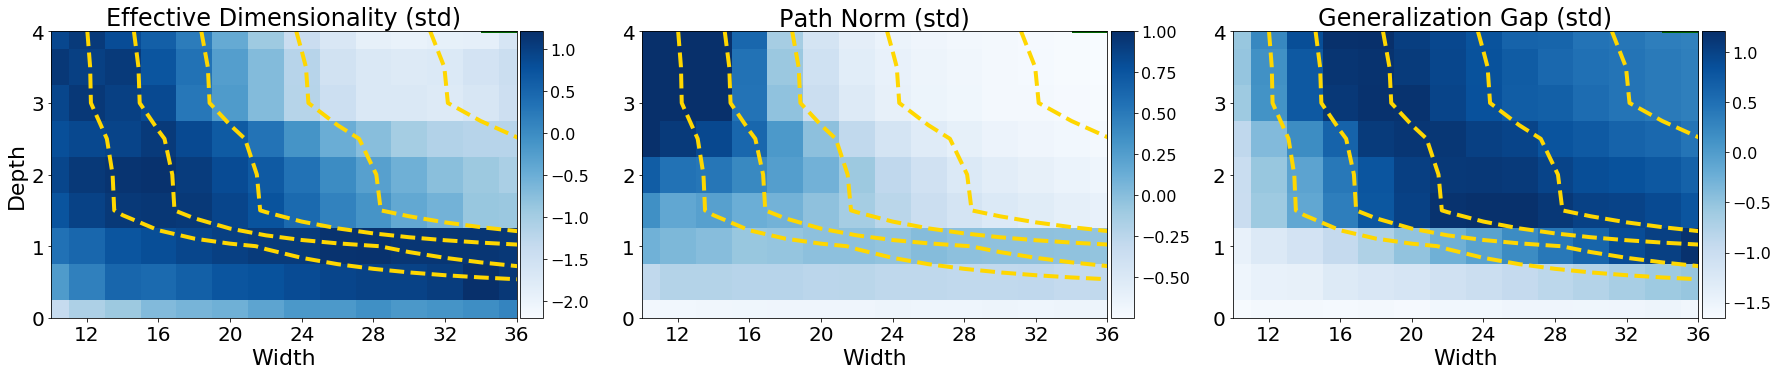

In [47]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 25))
plt.subplots_adjust(wspace=0.2)
width_cut = 1
depth_cut = 0
colormap = "Blues"
title_fs = 24
tick_fs = 16
axis_fs = 20
ax_fs = 22

p1 = ax1.imshow(std_eff_dims.numpy().transpose(), cmap=colormap)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p1, cax=cax)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label(r'$N_{eff}$(Hessian)', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax1)
ax1.set_ylim(depth_cut, 8-depth_cut)
ax1.set_xlim(width_cut, 15-width_cut)


ax1.set_ylabel('Depth', fontsize=ax_fs)
ax1.set_xlabel('Width', fontsize=ax_fs)
ax1.set_title('Effective Dimensionality (std)', fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=axis_fs)
ax1.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])

## test loss ##
p2 = ax2.imshow(std_path_norms.numpy().transpose(), cmap=colormap, vmax=1.)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p2, cax=cax2)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)

ax2.set_xlabel('Width',  fontsize=ax_fs)
# ax2.set_ylabel('Width')
ax2.set_title('Path Norm (std)', fontsize=title_fs)
ax2.tick_params(axis="both", labelsize=axis_fs)
ax2.set_ylim(depth_cut, 8-depth_cut)
ax2.set_xlim(width_cut, 15-width_cut)
ax2.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])


## train loss ##
p3 = ax3.imshow(std_gen_gap.numpy().transpose(), cmap=colormap)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(p3, cax=cax3)
cbar.ax.tick_params(labelsize=tick_fs)
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Width', fontsize=ax_fs)
# ax3.set_ylabel('Width')
ax3.set_title('Generalization Gap (std)', fontsize=title_fs)
ax3.tick_params(axis="both", labelsize=axis_fs)
ax3.set_ylim(depth_cut, 8-depth_cut)
ax3.set_xlim(width_cut, 15-width_cut)
ax3.set_yticklabels([str(i) for i in range(9)][depth_cut:]);
ax3.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:]);
plt.show();

//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


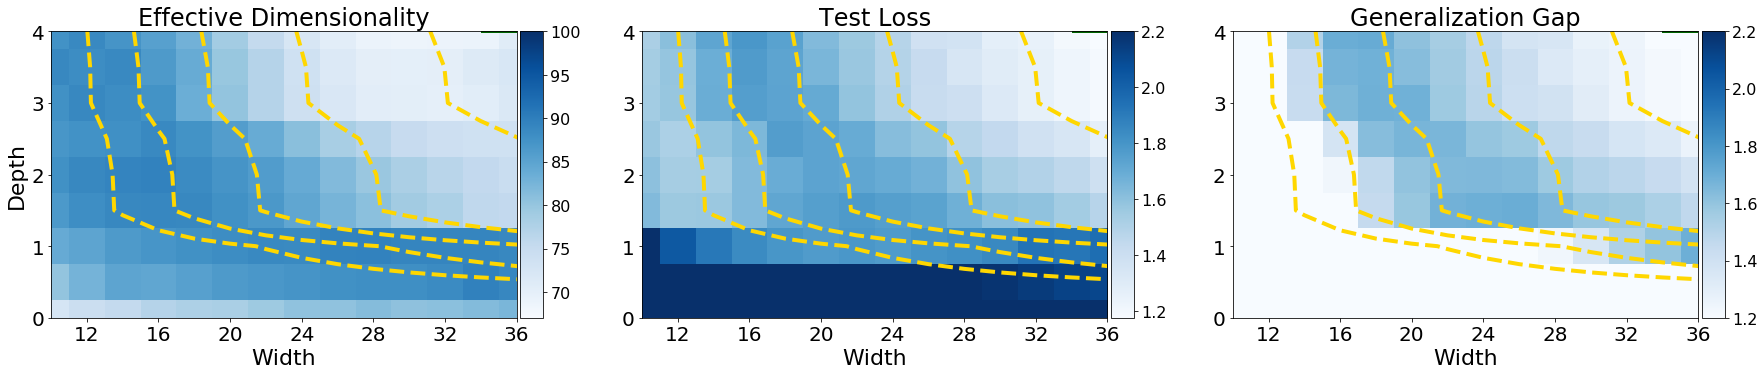

In [48]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 25))
plt.subplots_adjust(wspace=0.2)
width_cut = 1
depth_cut = 0
colormap = "Blues"
title_fs = 24
tick_fs = 16
axis_fs = 20
ax_fs = 22

p1 = ax1.imshow(eff_dim[width_cut:, depth_cut:].transpose(), cmap=colormap, vmax=100)
plot_cutoff_curve(ax1)
plot_par_contours(ax1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p1, cax=cax)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label(r'$N_{eff}$(Hessian)', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax1)
ax1.set_ylim(depth_cut, 8-depth_cut)
ax1.set_xlim(width_cut, 15-width_cut)


ax1.set_ylabel('Depth', fontsize=ax_fs)
ax1.set_xlabel('Width', fontsize=ax_fs)
ax1.set_title('Effective Dimensionality', fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=axis_fs)
ax1.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax1.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])

## test loss ##
p2 = ax2.imshow(losses[2,width_cut:, depth_cut:].transpose(), cmap=colormap, vmax=2.2)
plot_cutoff_curve(ax2)
plot_par_contours(ax2)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(p2, cax=cax2)
cbar.ax.tick_params(labelsize=tick_fs) 
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)

ax2.set_xlabel('Width',  fontsize=ax_fs)
# ax2.set_ylabel('Width')
ax2.set_title('Test Loss', fontsize=title_fs)
ax2.tick_params(axis="both", labelsize=axis_fs)
ax2.set_ylim(depth_cut, 8-depth_cut)
ax2.set_xlim(width_cut, 15-width_cut)
ax2.set_yticklabels([str(i) for i in range(9)][depth_cut:])
ax2.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:])


## train loss ##
p3 = ax3.imshow((losses[2,width_cut:, depth_cut:] - losses[0, width_cut:, depth_cut:]).transpose(), cmap=colormap,
                vmax=2.2, vmin=1.2)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(p3, cax=cax3)
cbar.ax.tick_params(labelsize=tick_fs)
# cbar.set_label('Loss', rotation=270, fontsize=axis_fs, labelpad=15)
plot_cutoff_curve(ax3)
plot_par_contours(ax3)

ax3.set_xlabel('Width', fontsize=ax_fs)
# ax3.set_ylabel('Width')
ax3.set_title('Generalization Gap', fontsize=title_fs)
ax3.tick_params(axis="both", labelsize=axis_fs)
ax3.set_ylim(depth_cut, 8-depth_cut)
ax3.set_xlim(width_cut, 15-width_cut)
ax3.set_yticklabels([str(i) for i in range(9)][depth_cut:]);
ax3.set_xticklabels([str(i) for i in range(4,68,4)][width_cut:]);
plt.savefig("./width-depth-exp.pdf", bbox_inches="tight")

0.0038